In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# Loading the dataset
def loaddata(filename):
    df = pd.read_csv(f'/content/drive/MyDrive/data-brm/{filename}.csv', sep=',', encoding='latin-1')
    return df

def loaddata2():
    df = pd.read_csv(f'/content/drive/MyDrive/cleaned_book_data.csv', sep=',', encoding='latin-1')
    return df

books   = loaddata2()
ratings = loaddata("ratings")

In [ ]:
ratings.shape

(5976479, 3)

In [ ]:
import pandas as pd

# Assuming you have loaded your ratings dataset into a DataFrame called 'ratings'

# Group by 'book_id' and count unique 'user_id' values for each book
book_ratings_count = ratings.groupby('book_id')['user_id'].nunique()

# Calculate the mean of the counts
average_users_per_book = book_ratings_count.mean()

print(f"Average number of users who rated each book: {average_users_per_book:.2f}")


Average number of users who rated each book: 597.65


In [ ]:
import pandas as pd

# Assuming you have loaded your ratings dataset into a DataFrame called 'ratings'

# Group by 'book_id' and count the number of ratings for each book
book_ratings_count = ratings['book_id'].value_counts().reset_index()
book_ratings_count.columns = ['book_id', 'ratings_count']

# Calculate the average number of ratings per book
average_ratings_per_book = book_ratings_count['ratings_count'].mean()

print(f"Average number of ratings per book: {average_ratings_per_book:.2f}")


Average number of ratings per book: 597.65


In [ ]:
import pandas as pd

# Assuming you have loaded your book dataset into a DataFrame called 'books'
# Also assuming you have calculated 'book_ratings_count' as described previously

# Define the threshold for the minimum number of ratings
threshold_ratings_count = 598  # Adjust this threshold as needed

# Filter the 'book_ratings_count' DataFrame to include books with more than the threshold number of ratings
popular_books = book_ratings_count[book_ratings_count['ratings_count'] > threshold_ratings_count]

# Get the count of books that meet the threshold
num_popular_books = len(popular_books)

print(f"Number of books with more than {threshold_ratings_count} ratings: {num_popular_books}")


Number of books with more than 598 ratings: 2108


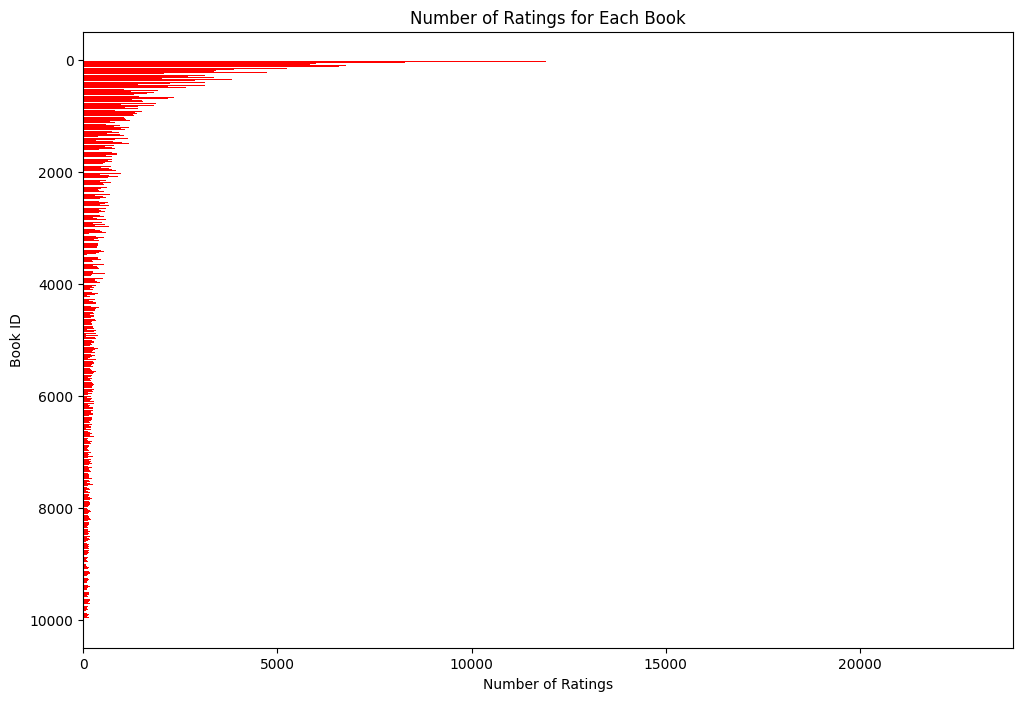

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your ratings dataset into a DataFrame called 'ratings'

# Group by 'book_id' and count the number of ratings for each book
book_ratings_count = ratings['book_id'].value_counts().reset_index()
book_ratings_count.columns = ['book_id', 'ratings_count']

# Sort by ratings_count in descending order (optional)
book_ratings_count = book_ratings_count.sort_values(by='ratings_count', ascending=False)

# Create a bar graph
plt.figure(figsize=(12, 8))
plt.barh(book_ratings_count['book_id'], book_ratings_count['ratings_count'], color='red')
plt.xlabel('Number of Ratings')
plt.ylabel('Book ID')
plt.title('Number of Ratings for Each Book')
plt.gca().invert_yaxis()  # Invert the y-axis for readability
plt.show()


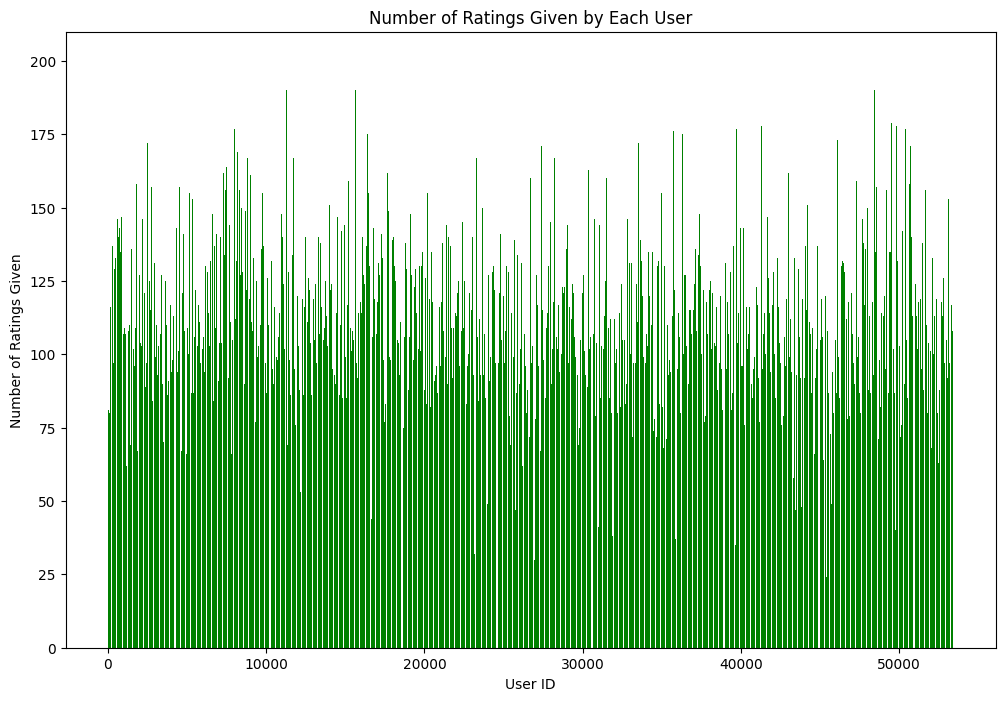

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your ratings dataset into a DataFrame called 'ratings'

# Group by 'user_id' and count the number of ratings for each user
user_ratings_count = ratings['user_id'].value_counts().reset_index()
user_ratings_count.columns = ['user_id', 'ratings_count']

# Sort by ratings_count in descending order (optional)
user_ratings_count = user_ratings_count.sort_values(by='ratings_count', ascending=False)

# Create a bar graph
plt.figure(figsize=(12, 8))
plt.bar(user_ratings_count['user_id'], user_ratings_count['ratings_count'], color='green')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings Given')
plt.title('Number of Ratings Given by Each User')
plt.show()


In [ ]:
import pandas as pd

# Assuming you have loaded your ratings dataset into a DataFrame called 'ratings'

# Group by 'book_id' and count the number of ratings for each book
book_ratings_count = ratings['book_id'].value_counts().reset_index()
book_ratings_count.columns = ['book_id', 'ratings_count']

# Find the book with the highest and lowest number of ratings
highest_rated_book = book_ratings_count.iloc[0]  # The first row has the highest count
lowest_rated_book = book_ratings_count.iloc[-1]  # The last row has the lowest count

print(f"Highest rated book (Book ID): {highest_rated_book['book_id']}, Ratings Count: {highest_rated_book['ratings_count']}")
print(f"Lowest rated book (Book ID): {lowest_rated_book['book_id']}, Ratings Count: {lowest_rated_book['ratings_count']}")


Highest rated book (Book ID): 1, Ratings Count: 22806
Lowest rated book (Book ID): 7803, Ratings Count: 8


In [ ]:
import pandas as pd

# Assuming you have loaded your ratings dataset into a DataFrame called 'ratings'

# Group by 'user_id' and count the number of ratings given by each user
user_ratings_count = ratings['user_id'].value_counts().reset_index()
user_ratings_count.columns = ['user_id', 'ratings_count']

# Find the user with the least and most number of ratings
user_with_least_ratings = user_ratings_count[user_ratings_count['ratings_count'] == user_ratings_count['ratings_count'].min()]
user_with_most_ratings = user_ratings_count[user_ratings_count['ratings_count'] == user_ratings_count['ratings_count'].max()]

# Print the user IDs and their respective ratings counts
print(f"User with the least number of ratings (User ID): {user_with_least_ratings['user_id'].values[0]}, Ratings Count: {user_with_least_ratings['ratings_count'].values[0]}")
print(f"User with the most number of ratings (User ID): {user_with_most_ratings['user_id'].values[0]}, Ratings Count: {user_with_most_ratings['ratings_count'].values[0]}")


User with the least number of ratings (User ID): 34590, Ratings Count: 19
User with the most number of ratings (User ID): 12874, Ratings Count: 200


In [ ]:
import pandas as pd

# Assuming you have loaded your ratings dataset into a DataFrame called 'ratings'

# Group by 'user_id' and count the number of ratings given by each user
user_ratings_count = ratings['user_id'].value_counts().reset_index()
user_ratings_count.columns = ['user_id', 'ratings_count']

# Calculate the average number of ratings per user
average_ratings_per_user = user_ratings_count['ratings_count'].mean()

print(f"Average number of ratings per user: {average_ratings_per_user:.2f}")


Average number of ratings per user: 111.87


In [ ]:
import pandas as pd

# Assuming you have loaded your ratings dataset into a DataFrame called 'ratings'

# Define the threshold for the minimum number of ratings
threshold_ratings_count = 100  # Adjust this threshold as needed

# Group by 'user_id' and count the number of ratings given by each user
user_ratings_count = ratings['user_id'].value_counts().reset_index()
user_ratings_count.columns = ['user_id', 'ratings_count']

# Filter the 'user_ratings_count' DataFrame to include users with more than the threshold number of ratings
active_users = user_ratings_count[user_ratings_count['ratings_count'] > threshold_ratings_count]

# Get the count of users who meet the threshold
num_active_users = len(active_users)

print(f"Number of users with more than {threshold_ratings_count} ratings: {num_active_users}")


Number of users with more than 100 ratings: 36199


In [ ]:
rating_users = ratings['user_id'].value_counts().reset_index().\
               rename({'index':'user_id','user_id':'rating'}, axis=1)

In [ ]:
rating_books = ratings['book_id'].value_counts().reset_index().\
               rename({'index':'book_id','book_id':'rating'}, axis=1)

In [ ]:
ratings = ratings[ratings['user_id'].isin(rating_users[rating_users['rating']>100]['user_id'])]
ratings = ratings[ratings['book_id'].isin(rating_books[rating_books['rating']> 7000]['book_id'])]

In [ ]:
ratings.shape

(673340, 3)

In [ ]:
ratings = ratings[ratings['rating'] > 3]  # Keep only ratings greater than 3

In [ ]:
# Check for NaN (null) values in the entire array
print(np.isnan(ratings).any())

In [ ]:
ratings.shape

(400000, 3)

In [ ]:
temp = ratings.head(50000)
ratings = temp

In [ ]:
ratings

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
49995,1507,212,5
49996,1507,3412,5
49997,1695,3869,1
49998,1695,8015,4


In [ ]:
# Preprocessing

# LabelEncoders defined to encode user_id and book_id. This converts categorical id to numeric id
user_encoder = LabelEncoder()
book_encoder = LabelEncoder()

ratings['user_id'] = user_encoder.fit_transform(ratings['user_id'])
ratings['book_id'] = book_encoder.fit_transform(ratings['book_id'])

In [ ]:
ratings

,user_id,book_id,rating
12,1,52,4
15,1,12,5
16,1,20,5
17,1,14,5
18,1,0,5
...,...,...,...
26795,373,56,3
26798,373,38,2
26799,376,19,3
26802,376,23,4


In [ ]:
num_users = len(user_encoder.classes_)
num_books = len(book_encoder.classes_)

In [ ]:
num_books

77

In [ ]:
# Train-test split
train_df, test_df = train_test_split(ratings, test_size=0.2, random_state=42)

In [ ]:
# Model
class BookRecommendationModel(nn.Module):
    def __init__(self, num_users, num_books, embedding_dim):
        super(BookRecommendationModel, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.book_embedding = nn.Embedding(num_books, embedding_dim)
        self.fc = nn.Linear(embedding_dim, 1)  # Remove multiplication by 2 in input size

        # print("user_embedding: ",self.user_embedding)
        # print("book_embedding: ",self.book_embedding)

    def forward(self, user_ids, book_ids):
        user_embedded = self.user_embedding(user_ids)
        book_embedded = self.book_embedding(book_ids)

        # print("user_embedded: ",user_embedded.shape)
        # print("book_embedded: ",book_embedded.shape)
        # Element-wise multiplication of embeddings
        combined = user_embedded * book_embedded

        # print("combined: ",combined.shape)

        prediction = self.fc(combined)

        # print("predictions: ",prediction)
        return prediction


In [ ]:
from google.colab import files

# Upload the saved model file from your local machine to Colab
uploaded = files.upload()

loaded_model = torch.load('book_recommendation_model_4L.pth')

# Ensure the loaded model is in evaluation mode (if needed)
loaded_model.eval()

# You can now use the loaded_model for inference or further training


Saving book_recommendation_model_4L.pth to book_recommendation_model_4L (2).pth


BookRecommendationModel(
  (user_embedding): Embedding(23238, 32)
  (book_embedding): Embedding(76, 32)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

In [ ]:
model = loaded_model

In [ ]:
# Training
embedding_dim = 32
model = BookRecommendationModel(num_users, num_books, embedding_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for _, row in train_df.iterrows():
        user_id = torch.LongTensor([row['user_id']])
        book_id = torch.LongTensor([row['book_id']])
        rating = torch.FloatTensor([row['rating']])

        # print(user_id," ",book_id," ",rating)
        optimizer.zero_grad()
        prediction = model(user_id, book_id)
        loss = criterion(prediction, rating)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_df)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/3, Train Loss: 1.1827
Epoch 2/3, Train Loss: 1.0816
Epoch 3/3, Train Loss: 1.0532


In [ ]:
# Training
embedding_dim = 32
model = BookRecommendationModel(num_users, num_books, embedding_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for _, row in train_df.iterrows():
        user_id = torch.LongTensor([row['user_id']])
        book_id = torch.LongTensor([row['book_id']])
        rating = torch.FloatTensor([row['rating']])

        # print(user_id," ",book_id," ",rating)
        optimizer.zero_grad()
        prediction = model(user_id, book_id)
        loss = criterion(prediction, rating)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_df)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/5, Train Loss: 1.2277
Epoch 2/5, Train Loss: 0.9079
Epoch 3/5, Train Loss: 0.7265
Epoch 4/5, Train Loss: 0.6124
Epoch 5/5, Train Loss: 0.5435


In [ ]:
# Testing
model.eval()
test_loss = 0.0
predictions = []
with torch.no_grad():
    for _, row in test_df.iterrows():
        user_id = torch.LongTensor([row['user_id']])
        book_id = torch.LongTensor([row['book_id']])
        rating = torch.FloatTensor([row['rating']])

        prediction = model(user_id, book_id)
        loss = criterion(prediction, rating)
        test_loss += loss.item()
        predictions.append(prediction.numpy()[0])

test_loss /= len(test_df)
rmse = np.sqrt(mean_squared_error(test_df['rating'], predictions))
mae = mean_absolute_error(test_df['rating'], predictions)
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")

Test RMSE: 1.3136
Test MAE: 1.0434


In [ ]:
model.eval()

BookRecommendationModel(
  (user_embedding): Embedding(23238, 32)
  (book_embedding): Embedding(76, 32)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print(current_directory)


/content


In [ ]:
# Saving the entire model
torch.save(model, 'book_recommendation_model_4L.pth')

In [ ]:
from google.colab import files
# Download the saved model file
files.download('book_recommendation_model_4L.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def recommend_books(user_id, model, user_encoder, book_encoder, num_recommendations=10):
    model.eval()
    user_tensor = torch.LongTensor([user_id])
    book_ids = torch.arange(num_books).unsqueeze(0)  # Change this line

    user_ids = user_tensor.repeat(1, num_books)

    with torch.no_grad():
        predictions = model(user_ids, book_ids).squeeze()

    # Exclude books that the user has already rated
    rated_books = train_df[train_df['user_id'] == user_id]['book_id'].values
    unrated_books = np.setdiff1d(np.arange(num_books), rated_books)

    # print("unrated: ",unrated_books)

    # print(predictions[unrated_books])
    # Get indices of top recommendations
    recommended_ratings = predictions[unrated_books]
    top_indices = recommended_ratings.argsort(descending=True)[:num_recommendations]
    # print("top indices: ",top_indices)
    # top_book_ids = unrated_books[top_indices]

    recommended_books = unrated_books[top_indices]
    predicted_ratings = recommended_ratings[top_indices]

    # print(recommended_books)

    # Convert book IDs back to original values using the encoder
    recommended_books_original = book_encoder.inverse_transform(recommended_books)
    # # Convert book IDs back to original values using the encoder
    # recommended_books = book_encoder.inverse_transform(top_book_ids)
    return recommended_books_original,predicted_ratings

In [ ]:
model

In [ ]:
# Provide a user ID and get book recommendations
user_id_to_recommend = 720  # Change this to the user ID you want to recommend books for
recommended_books,predicted_ratings = recommend_books(user_id_to_recommend, model, user_encoder, book_encoder)

print(f"Recommended books for user {user_id_to_recommend}:")
for book_id, rating in zip(recommended_books, predicted_ratings):
    book_info = books[books['book_id'] == book_id]
    title = book_info['title'].values[0]
    print(f"Book ID: {book_id}, Title: {title}, Predicted Rating: {rating:.4f}")

Recommended books for user 720:
Book ID: 131, Title: Genesis: Finding Our Roots, Predicted Rating: 4.4515
Book ID: 45, Title: The Saddest Pony, Predicted Rating: 4.4205
Book ID: 69, Title: Ain't No Tomorrow, Predicted Rating: 4.4205
Book ID: 33, Title: The Red Rose Girls: An Uncommon Story of Art and Love, Predicted Rating: 4.3123
Book ID: 29, Title: Paul: His Story, Predicted Rating: 4.2375
Book ID: 48, Title: The Pony and the Lost Swan, Predicted Rating: 4.2136
Book ID: 60, Title: Minoans: Life in Bronze Age Crete, Predicted Rating: 4.2061
Book ID: 42, Title: The Winning Pony, Predicted Rating: 4.1398
Book ID: 9, Title: Anthropological Studies of Religion: An Introductory Text, Predicted Rating: 4.1156
Book ID: 59, Title: The End of the Bronze Age: Changes in Warfare and the Catastrophe ca. 1200 B.C., Predicted Rating: 4.0971


In [ ]:
# Provide a user ID and get book recommendations
user_id_to_recommend = 720  # Change this to the user ID you want to recommend books for
recommended_books,predicted_ratings = recommend_books(user_id_to_recommend, model, user_encoder, book_encoder)

print(f"Recommended books for user {user_id_to_recommend}:")
for book_id, rating in zip(recommended_books, predicted_ratings):
    book_info = books[books['book_id'] == book_id]
    title = book_info['title'].values[0]
    print(f"Book ID: {book_id}, Title: {title}, Predicted Rating: {rating:.4f}")

Recommended books for user 720:
Book ID: 6364, Title: A Hunter's Desires, Predicted Rating: 7.0239
Book ID: 1663, Title: Buck Up, Little Buckaroo, Predicted Rating: 6.5071
Book ID: 480, Title: Gold Fever!: Tales from the California Gold Rush, Predicted Rating: 6.4961
Book ID: 1189, Title: The Great Eggscape, Predicted Rating: 6.4952
Book ID: 3128, Title: The Next Eco Warriors: 22 Young Women and Men Who Are Saving the Planet, Predicted Rating: 6.4897
Book ID: 2671, Title: Start Exploring: Gray's Anatomy: A Fact-Filled Coloring Book, Predicted Rating: 6.4416
Book ID: 9461, Title: Trust Me, I'm Dr. Ozzy: Advice from Rock's Ultimate Survivor, Predicted Rating: 6.4002
Book ID: 3124, Title: Electrified Sheep: Glass-Eating Scientists, Nuking the Moon, and More Bizarre Experiments, Predicted Rating: 6.3543
Book ID: 597, Title: The Passage, Predicted Rating: 6.2813
Book ID: 2242, Title: Nonrequired Reading, Predicted Rating: 6.2657
